## - Nombres: - Miguel Espildora Jara.
##            - Joan Retamales Moya.
## - Asignatura: Analítica.
## - Docente: Ana Moya Beltrán.

Acerca de los datos:
Aplicación: el nombre de la aplicación
- Se utiliza el mismo dataset que hemos utilizado desde principio de semestre.

**Categoría:**  la categoría de la aplicación

**Calificación:** la calificación de la aplicación en Play Store

**Reseñas:** la cantidad de reseñas de la aplicación

**Tamaño:** el tamaño de la aplicación

**Instalación:** la cantidad de instalaciones de la aplicación

**Tipo:** el tipo de aplicación (gratuita/de pago)

**Precio:** el precio de la aplicación (0 si es gratuita)

**Calificación de contenido:** el público objetivo adecuado de la aplicación

**Géneros:** el género de la aplicación

**Última actualización:** la fecha en la que se actualizó la aplicación por última vez

**Versión actual:** la versión actual de la aplicación

**Versión de Android:** la versión mínima de Android necesaria para ejecutar la aplicación


- **Importing Necessary Libraries**

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:120%; text-align:left">
    
En primer lugar, importaré todas las bibliotecas necesarias que utilizaremos a lo largo del proyecto. Esto generalmente incluye bibliotecas para manipulación de datos, visualización de datos y otras según las necesidades específicas del proyecto:

In [254]:
# Data
import numpy as np
import pandas as pd
from collections import defaultdict

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
from wordcloud import WordCloud

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# Hide warnings
import warnings
warnings.filterwarnings('ignore')


<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:120%; text-align:left">
    
A continuación, cargaré el conjunto de datos en un DataFrame de pandas, lo que facilitará su manipulación y análisis:

In [255]:
df = pd.read_csv("googleplaystore.csv")
df2 = pd.read_csv("E:/respaldo_2024-10-19/analitica/googleplaystore.csv")

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:120%; text-align:left">
    
Luego, obtendré una comprensión profunda del conjunto de datos antes de proceder a las etapas de limpieza y transformación de datos.

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:120%; text-align:left">

Primero realizaré un análisis preliminar para entender la estructura y los tipos de columnas de datos:

In [256]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5641,Five Nights at Freddy's: SL,GAME,4.5,16162,99M,"100,000+",Paid,$2.99,Teen,Action,"April 6, 2017",1.2,2.3 and up
5230,AJ Cam,PHOTOGRAPHY,5.0,44,2.8M,100+,Free,0,Everyone,Photography,"January 23, 2018",1.0,4.1 and up
1761,Magic Tiles 3,GAME,4.5,592282,Varies with device,"50,000,000+",Free,0,Everyone,Music,"August 3, 2018",5.13.007,4.1 and up
4380,N Launcher Pro - Nougat 7.0,PERSONALIZATION,4.3,2538,6.4M,"100,000+",Paid,$2.99,Everyone,Personalization,"March 23, 2018",1.5.1,4.1 and up
2623,Tango - Live Video Broadcast,SOCIAL,4.3,3806669,Varies with device,"100,000,000+",Free,0,Mature 17+,Social,"August 1, 2018",Varies with device,Varies with device


In [257]:
df2.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4331,Lie Detector,FAMILY,3.1,306,2.9M,"50,000+",Free,0,Everyone,Simulation,"April 4, 2017",1.2.1,4.0.3 and up
966,Food Network,ENTERTAINMENT,4.1,7813,Varies with device,"500,000+",Free,0,Teen,Entertainment,"July 27, 2018",Varies with device,Varies with device
1011,"SeatGeek – Tickets to Sports, Concerts, Broadway",EVENTS,4.4,15558,26M,"1,000,000+",Free,0,Everyone,Events,"August 3, 2018",2018.07.31229,5.0 and up
1087,Alfa-Bank (Alfa-Bank),FINANCE,4.0,44545,Varies with device,"1,000,000+",Free,0,Everyone,Finance,"July 31, 2018",Varies with device,Varies with device
8224,DB TOS - Pocket Helper,TOOLS,4.2,265,Varies with device,"10,000+",Free,0,Everyone,Tools,"May 22, 2016",1.7,4.0 and up


In [258]:
df.shape

(10841, 13)

In [259]:
df2.shape

(10841, 13)

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:120%; text-align:left">
    
**Como podemos ver tenemos datos de 10841 aplicaciones que constan de 13 atributos.**

In [260]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [261]:
df2.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [262]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [263]:
df2.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:120%; text-align:left">
    
**Aquí podemos ver que solo la columna Calificación está solo en float, por lo que necesitamos convertir columnas numéricas en int y float.**  

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [265]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## **Preprocesamiento**

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:120%; text-align:left">
    
**Como la mayoría de las características están configuradas como objeto de tipo de datos y tienen sufijos, el tipo de datos de cada característica debe convertirse a un formato adecuado para el análisis.**

### Comprobando si todos los valores en el número de Reseñas son numéricos
    
## **Reviews**

In [266]:
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [267]:
df2[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:120%; text-align:left">
    
Podríamos haberlo convertido en un número entero como hicimos para el tamaño, pero los datos de esta aplicación se ven diferentes. Se puede observar que las entradas se ingresaron incorrectamente. Podríamos solucionarlo configurando la categoría como nan y cambiando todos los valores, pero eliminando la muestra por ahora.

In [268]:
df=df.drop(df.index[10472])

In [269]:
df2=df2.drop(df2.index[10472])

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:120%; text-align:left">
    
**La función Reseñas debe ser de tipo entero.**

In [270]:
df["Reviews"] = df["Reviews"].astype(int)


In [271]:
df2["Reviews"] = df2["Reviews"].astype(int)


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [273]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


<a id="monetary"></a>
## <b><span style='color:#fcc36d'>Step 3.2 |</span><span style='color:#ff6200'> Size</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:120%; text-align:left">
    
* Se puede ver que los datos tienen prefijos métricos (kilo y mega) junto con otra cadena. Reemplace k y M con sus valores para convertir los valores a numéricos.

* La característica Tamaño debe ser de tipo flotante.
* El sufijo, que es una unidad de tamaño, debe eliminarse. \ Ejemplo: '19.2M' a 19.2

* Si el tamaño se proporciona como 'Varía según el dispositivo', lo reemplazamos con 0

* Los valores flotantes convertidos de Tamaño se representan en unidades de megabytes.


In [274]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [275]:
df2['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:120%; text-align:left">

*Elimina todos los caracteres del tamaño y conviértelo en flotante.



In [276]:
df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
#apps['size']=apps['size'].str.replace('.','')
df['Size']=df['Size'].replace("Varies with device",np.nan)
df['Size']=df['Size'].astype('float')
df['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [277]:
df2['Size']=df2['Size'].str.replace('M','000')
df2['Size']=df2['Size'].str.replace('k','')
#apps['size']=apps['size'].str.replace('.','')
df2['Size']=df2['Size'].replace("Varies with device",np.nan)
df2['Size']=df2['Size'].astype('float')
df2['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:120%; text-align:left">
    
*¡Hay un problema! Algunas aplicaciones tienen un tamaño en megabytes y otras en kilobytes.

In [278]:
###### Convert mega to kilo then convert all to mega
for i in df['Size']:
    if i < 10:
        df['Size']=df['Size'].replace(i,i*1000)
df['Size']=df['Size']/1000
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [279]:
###### Convert mega to kilo then convert all to mega
for i in df2['Size']:
    if i < 10:
        df2['Size']=df2['Size'].replace(i,i*1000)
df2['Size']=df2['Size']/1000
df2['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [281]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


## **Instalacion y Precios**

* La función Instalaciones debe ser de tipo entero.

* Los caracteres ',' y '+' deben eliminarse. \ Ejemplo: '10,000+' a 10000

* La función Precio debe ser de tipo flotante.

* El sufijo '\$' debe eliminarse si el Precio no es cero. \ Ejemplo: '$4.99' a 4.99

In [282]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [283]:
df2['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [284]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [285]:
items_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in items_to_remove:
    for col in cols_to_clean:
        df[col]=df[col].str.replace(item,'')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [286]:
df.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [287]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [288]:
df[df['Price']=='Everyone']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [289]:
df['Installs']=df['Installs'].astype('int')
df['Price']=df['Price'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


## **Ultima actualización**

  * Actualización del tipo de datos de la columna Última actualización de cadena a fecha y hora de Pandas.

* Extracción de las nuevas columnas Año actualizado, Mes actualizado y Día actualizado.

In [290]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [291]:
#### Change Last update into a datetime column
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [292]:
df['Updated_Month']=df['Last Updated'].dt.month
df['Updated_Year']=df['Last Updated'].dt.year

In [293]:
df.drop('Last Updated', axis=1, inplace=True)

In [294]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,2018


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Month   10840 non-null  int32  
 13  Updated_Year    10840 non-null  int32  
dtypes: float64(3), int32(2), int64(2), object(7)
memory usage: 1.2+ MB


## **Step 4 | Limpieza de datos**

In [296]:
null = pd.DataFrame({'Valores nulos' : df.isna().sum().sort_values(ascending=False), 'Porcentaje de valores nulos' : (df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
null

,Valores nulos,Porcentaje de valores nulos
Size,1695,15.636531
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
Category,0,0.000000
Installs,0,0.000000
Reviews,0,0.000000
App,0,0.000000
Price,0,0.000000


<BarContainer object of 14 artists>

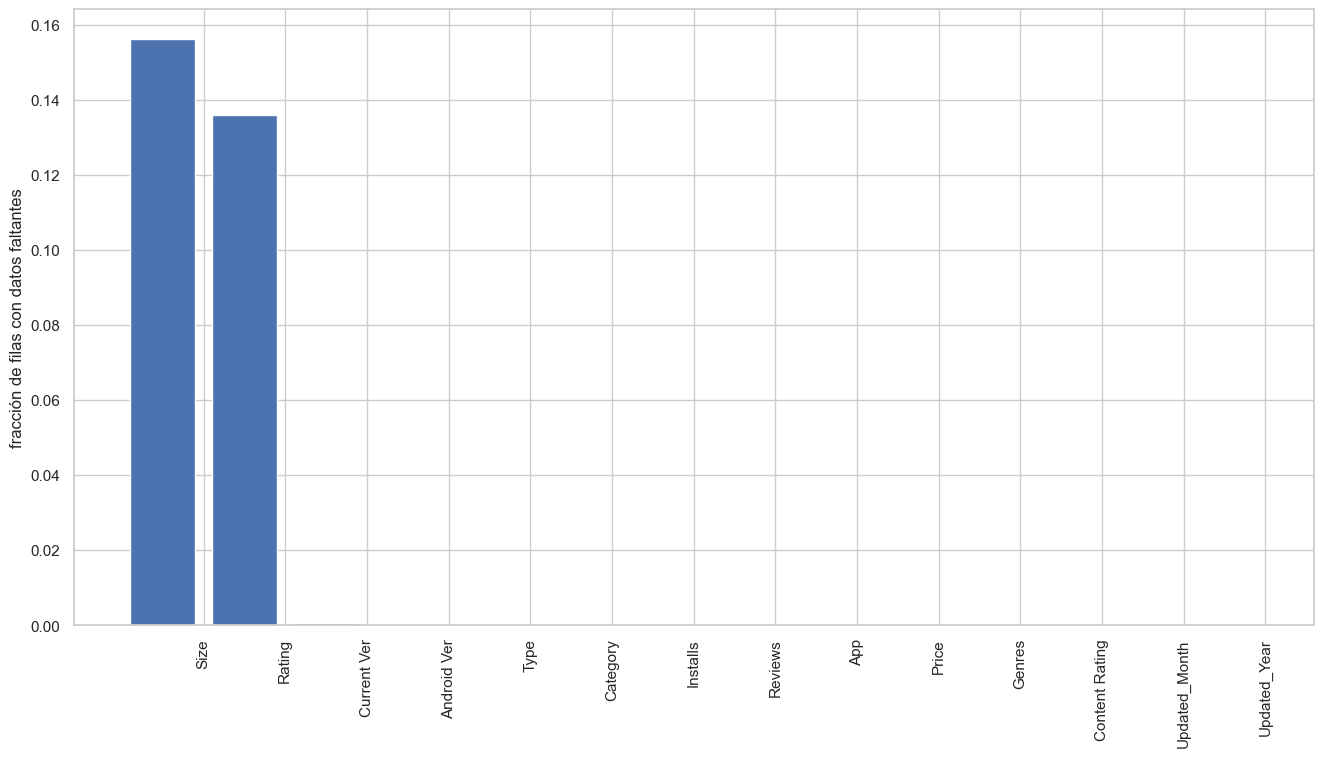

In [297]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fracción de filas con datos faltantes')
plt.bar(np.arange(len(null_counts)),null_counts)

**Está claro que nos faltan valores en Clasificación, Tipo, Clasificación de contenido, Versión actual y Versión de Android.**

## **Manejo de valores faltantes**

**Limpio los valores faltantes usando la imputación de valores aleatorios porque es la mejor manera de mantener la distribución de cada característica.**

In [298]:
def impute_median(series):
    return series.fillna(series.median())

df['Rating'] = df['Rating'].transform(impute_median)

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Month   10840 non-null  int32  
 13  Updated_Year    10840 non-null  int32  
dtypes: float64(3), int32(2), int64(2), object(7)
memory usage: 1.2+ MB


In [300]:
def impute_median(series):
    return series.fillna(series.median())

df['Size'] = df['Size'].transform(impute_median)

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Month   10840 non-null  int32  
 13  Updated_Year    10840 non-null  int32  
dtypes: float64(3), int32(2), int64(2), object(7)
memory usage: 1.2+ MB


In [302]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Current Ver       8
Android Ver       2
Updated_Month     0
Updated_Year      0
dtype: int64

In [303]:
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)

In [304]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       8
Android Ver       2
Updated_Month     0
Updated_Year      0
dtype: int64

## **Eliminar datos duplicados**

In [305]:
duplicate = df.duplicated()
print(duplicate.sum())

484


In [306]:
df.drop_duplicates(inplace=True)

In [307]:
duplicate = df.duplicated()
print(duplicate.sum())

0


<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:120%; text-align:left">
Extraer características numéricas y categóricas

In [308]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Updated_Month',
 'Updated_Year']

In [309]:
cat_features=[col for col in df.columns if df[col].dtype=='O']
cat_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

## **Comprobar valores atípicos**

<Axes: ylabel='Rating'>

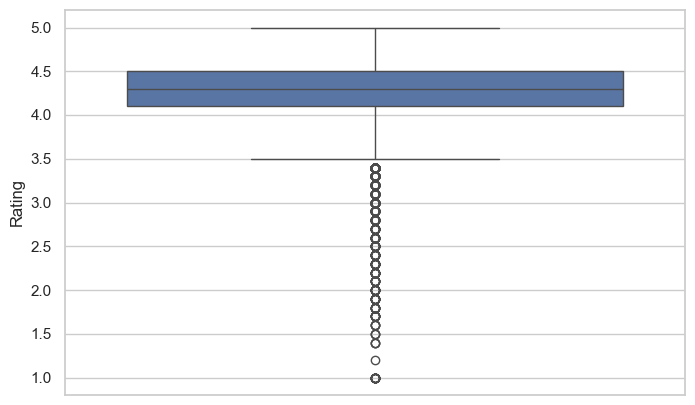

In [310]:
sns.boxplot(df["Rating"])

<Axes: ylabel='Rating'>

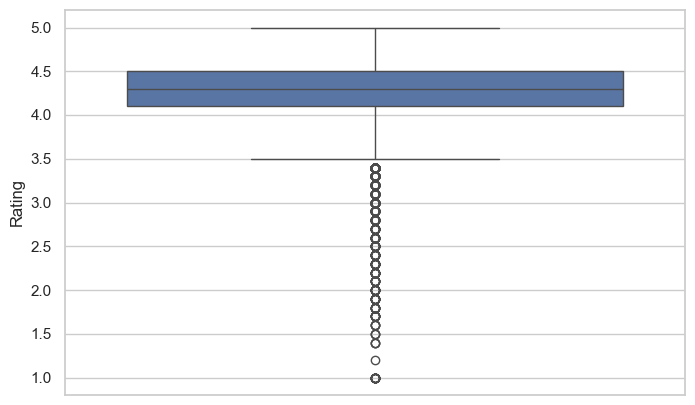

In [311]:
sns.boxplot(df["Rating"])

<Axes: ylabel='Size'>

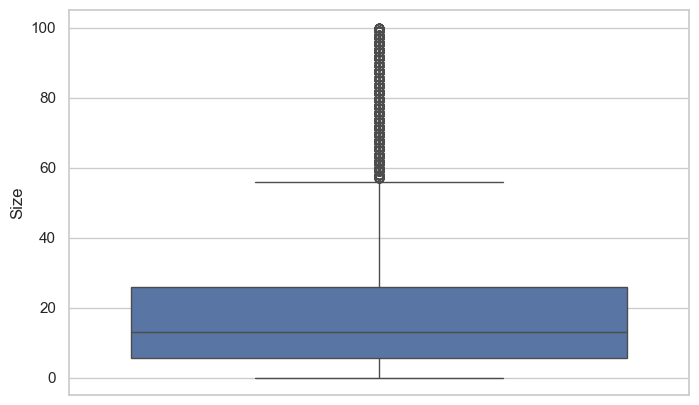

In [312]:
sns.boxplot(df["Size"])

<Axes: ylabel='Installs'>

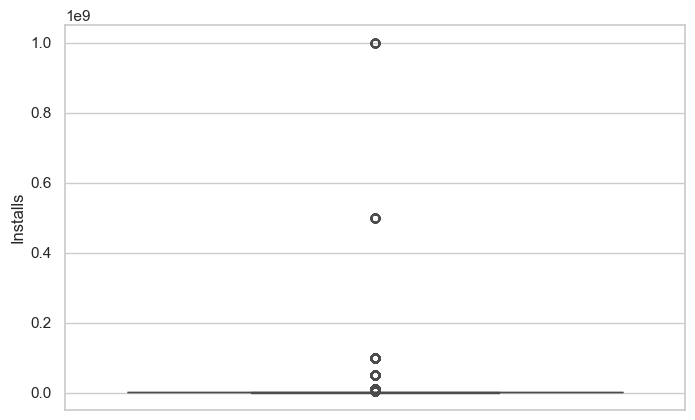

In [313]:
sns.boxplot(df["Installs"])

<Axes: ylabel='Rating'>

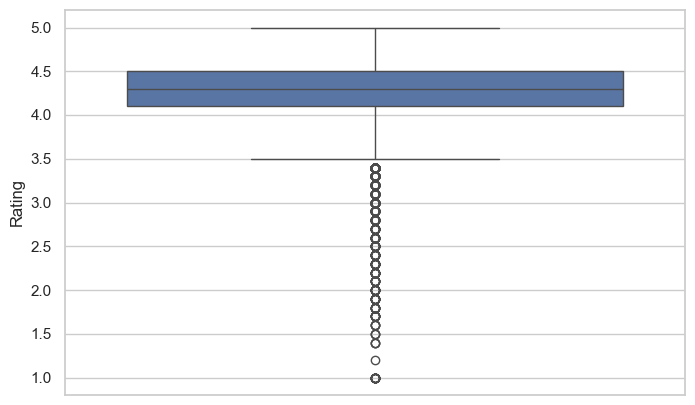

In [314]:
sns.boxplot(df["Rating"])

<Axes: ylabel='Price'>

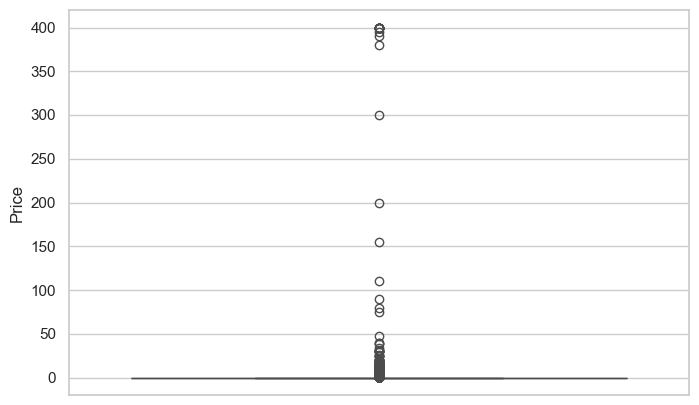

In [315]:
sns.boxplot(df["Price"])

## **Análisis exploratorio de datos (EDA)**



- **Category Column**

In [316]:
df['Category'].value_counts()

Category
FAMILY                 1943
GAME                   1121
TOOLS                   842
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: count, dtype: int64

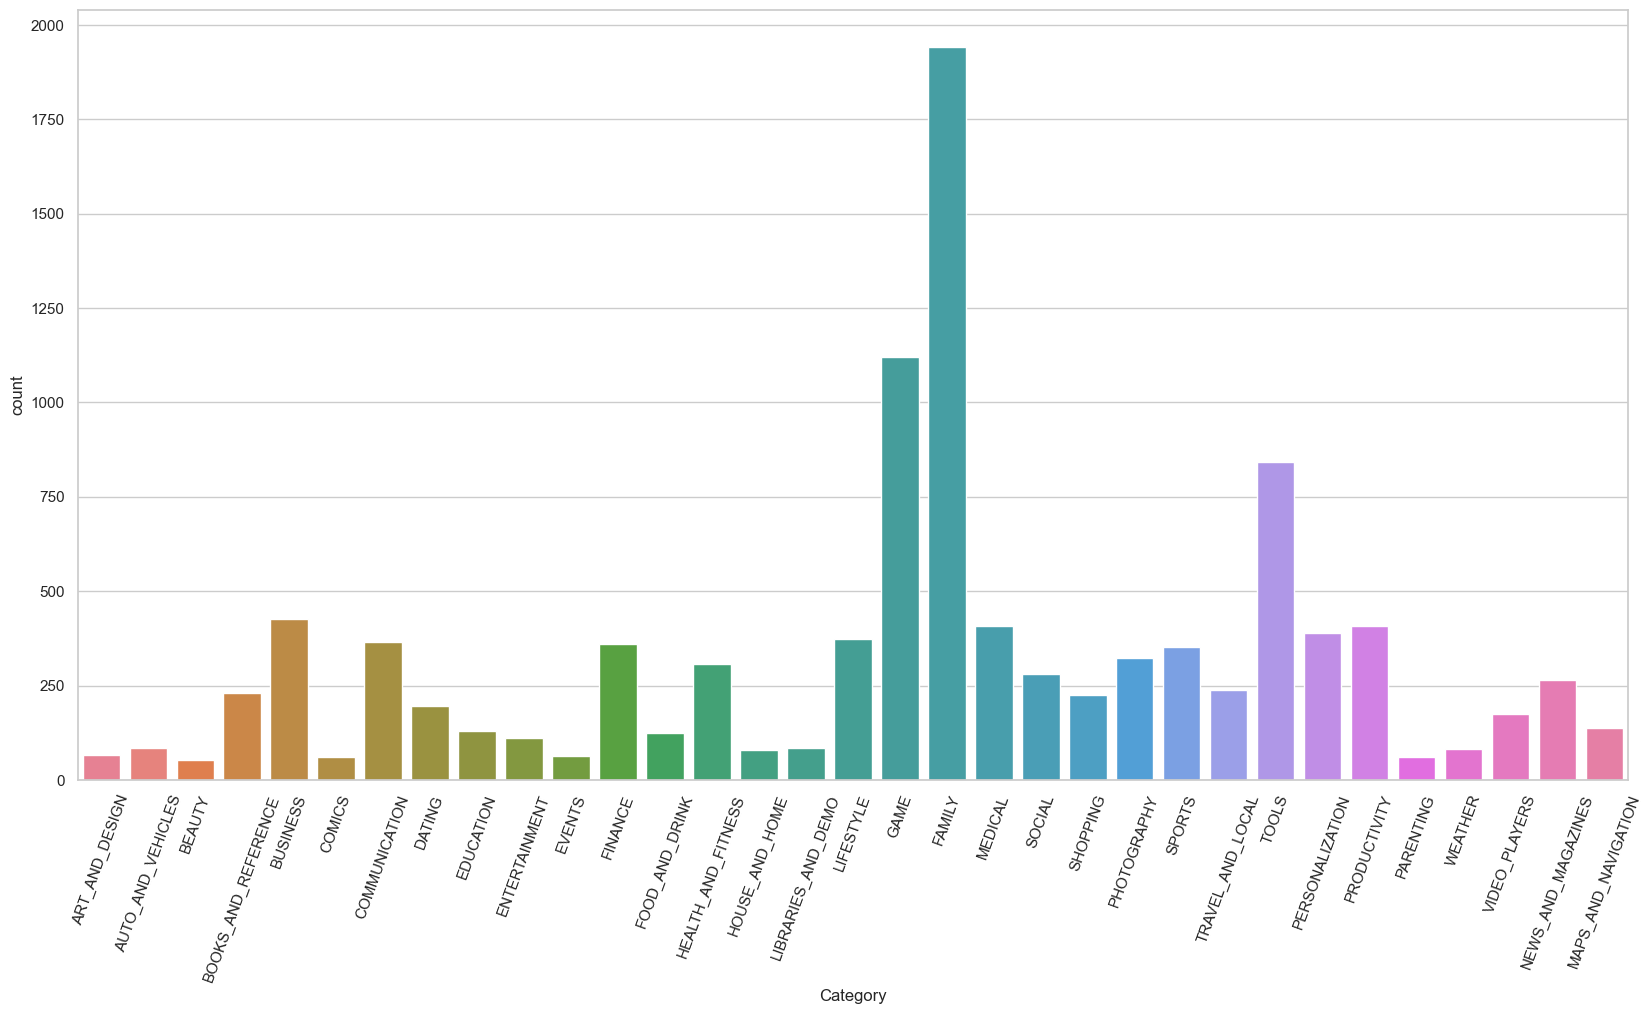

In [317]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Category', data=df, palette='husl')  # Usa 'husl' o cualquier otra paleta de seaborn
plt.xticks(rotation=70)
plt.show()


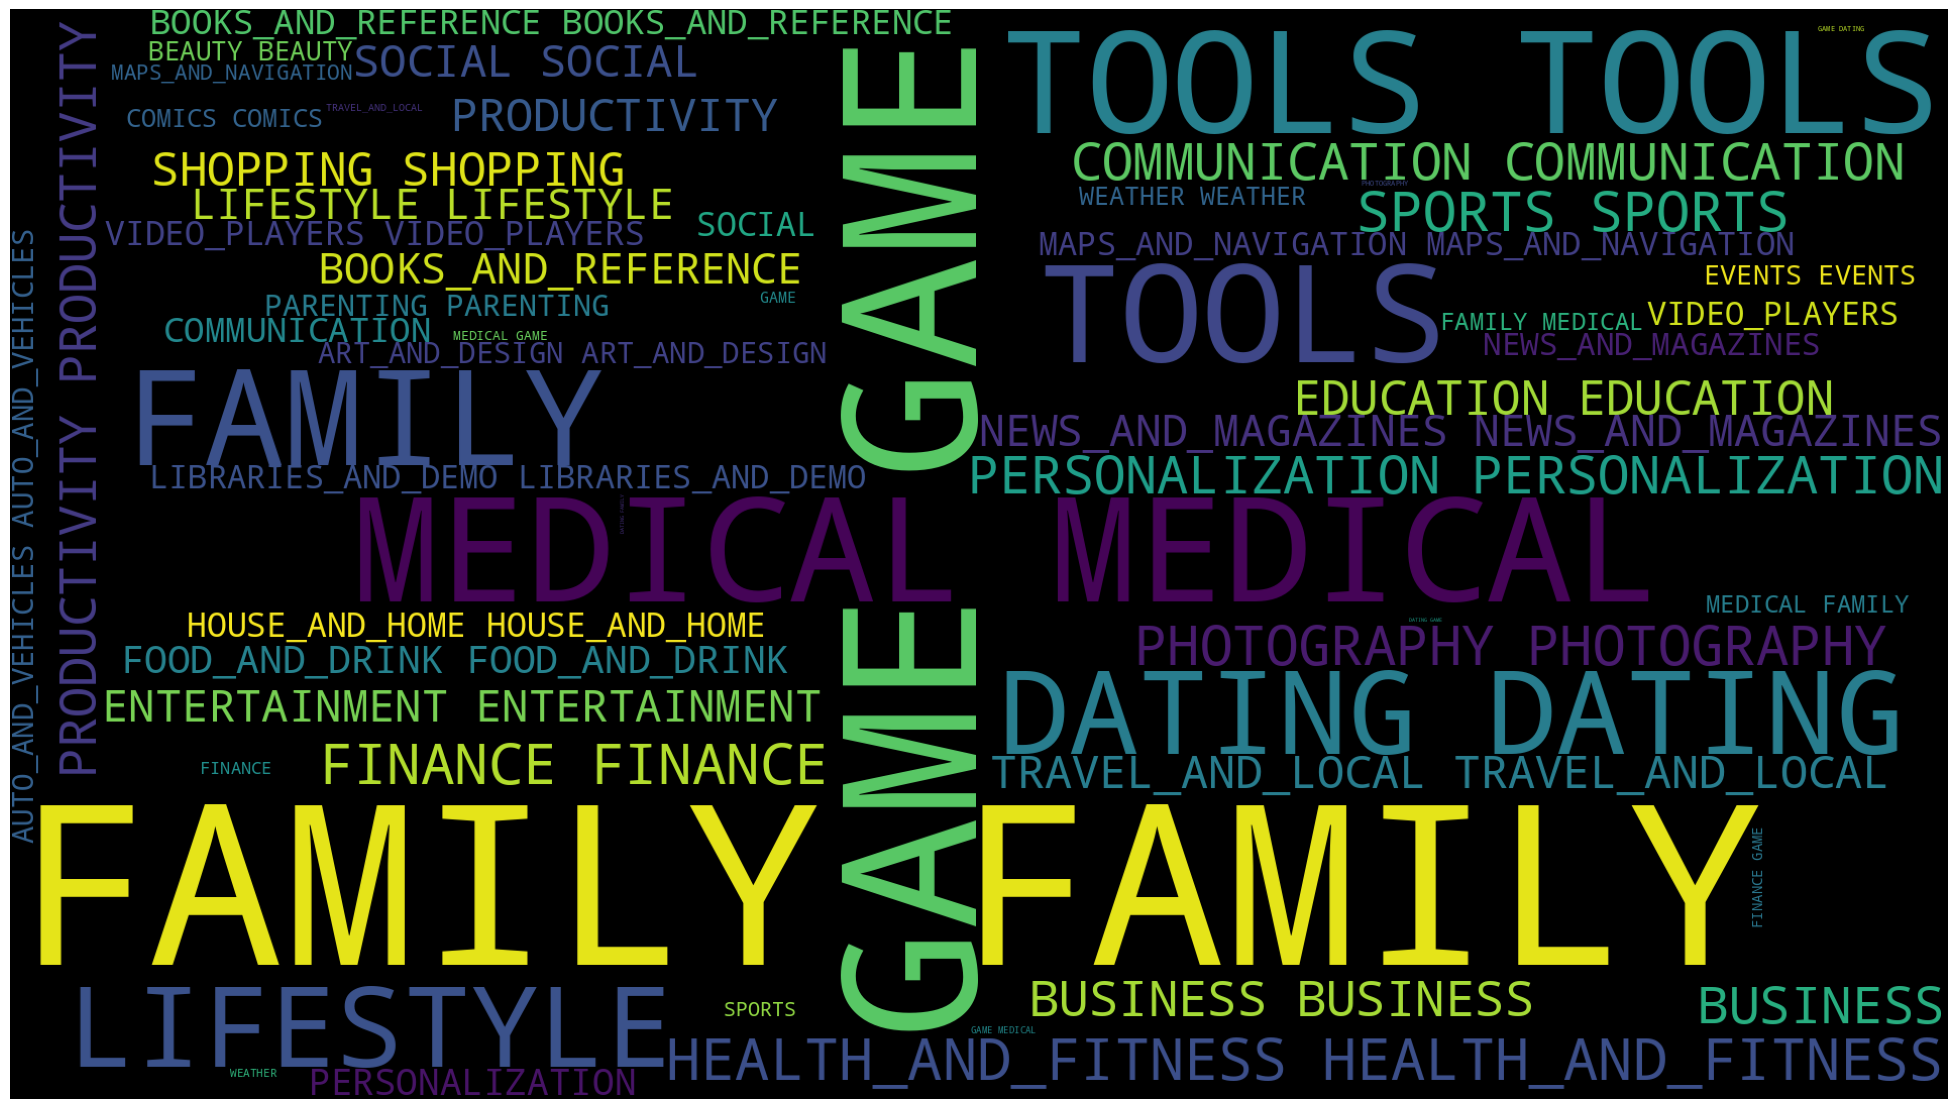

In [318]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Category))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Análisis de categoría versus calificación

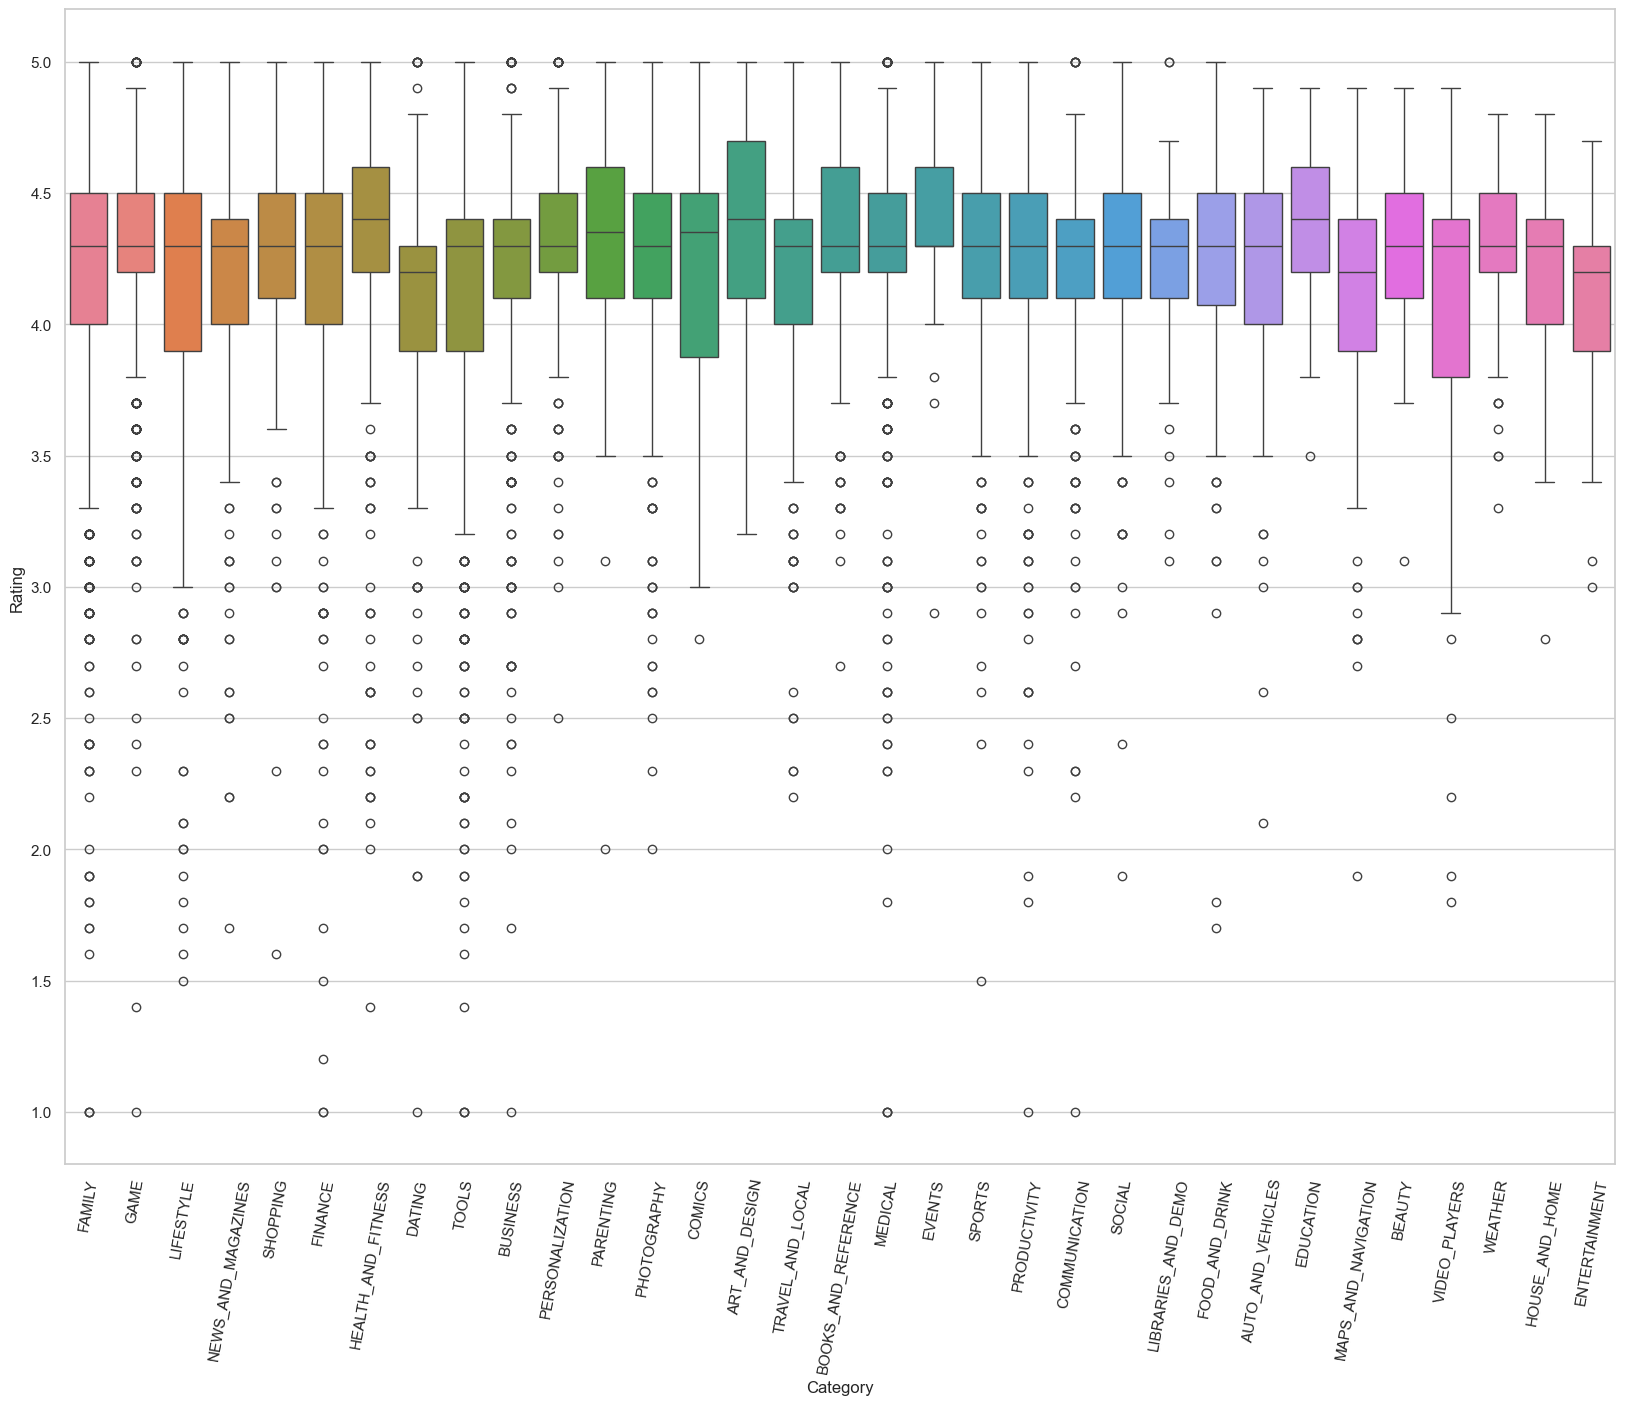

In [319]:
plt.figure(figsize=(20, 15))
sns.boxplot(y='Rating', x='Category', data=df.sort_values('Rating', ascending=False), palette='husl')  # Cambia 'husl' por la paleta que prefieras
plt.xticks(rotation=80)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:60%; text-align:left">

## Type Column

In [320]:
df['Type'].value_counts()

Type
Free    9591
Paid     765
Name: count, dtype: int64

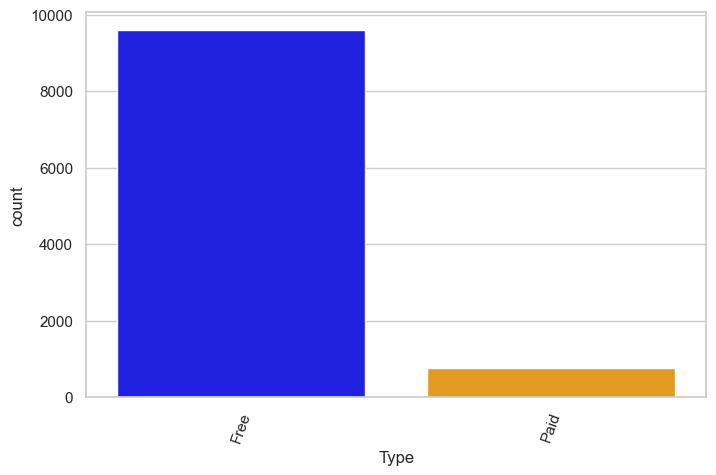

In [321]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.countplot(x='Type', data=df, palette={'Free': 'blue', 'Paid': 'orange'})  # Especifica colores para cada tipo
plt.xticks(rotation=70)
plt.show()

<Axes: ylabel='count'>

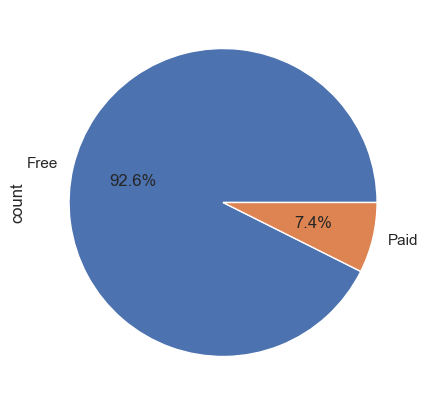

In [322]:
df["Type"].value_counts().plot.pie(autopct = "%1.1f%%")

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:60%; text-align:left">

## Type vs Rating Analysis

<Figure size 1500x800 with 0 Axes>

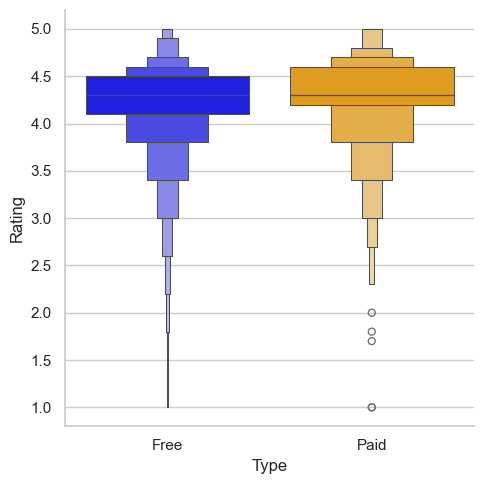

In [323]:
plt.figure(figsize=(15, 8))
sns.catplot(
    y='Rating',
    x='Type',
    data=df.sort_values('Rating', ascending=False),
    kind='boxen',
    palette={'Free': 'blue', 'Paid': 'orange'}  # Especifica los colores para cada tipo
)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:60%; text-align:left">

## Columna de clasificación de contenido

In [324]:
df['Content Rating'].value_counts()

Content Rating
Everyone           8381
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:80%; text-align:left">

## Clasificación de contenido vs análisis de clasificación

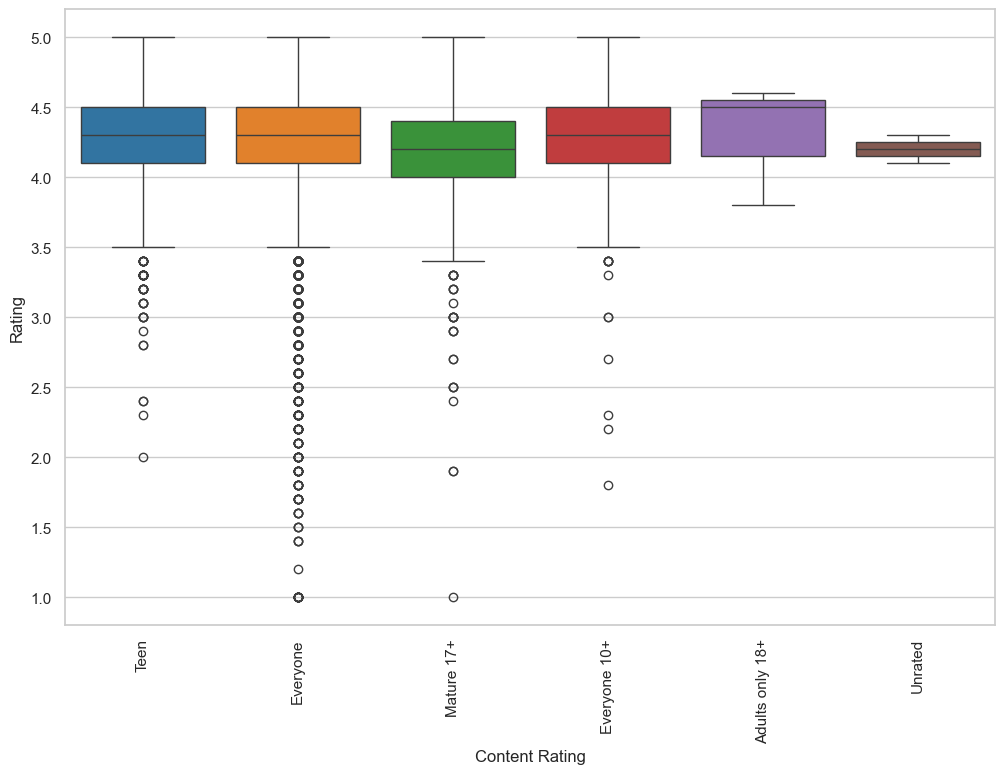

In [325]:
# Paleta de colores personalizada similar a la imagen
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(12, 8))
sns.boxplot(y='Rating', x='Content Rating', data=df.sort_values('Rating', ascending=False), palette=custom_colors)
plt.xticks(rotation=90)
plt.show()


<Axes: xlabel='Content Rating', ylabel='Installs'>

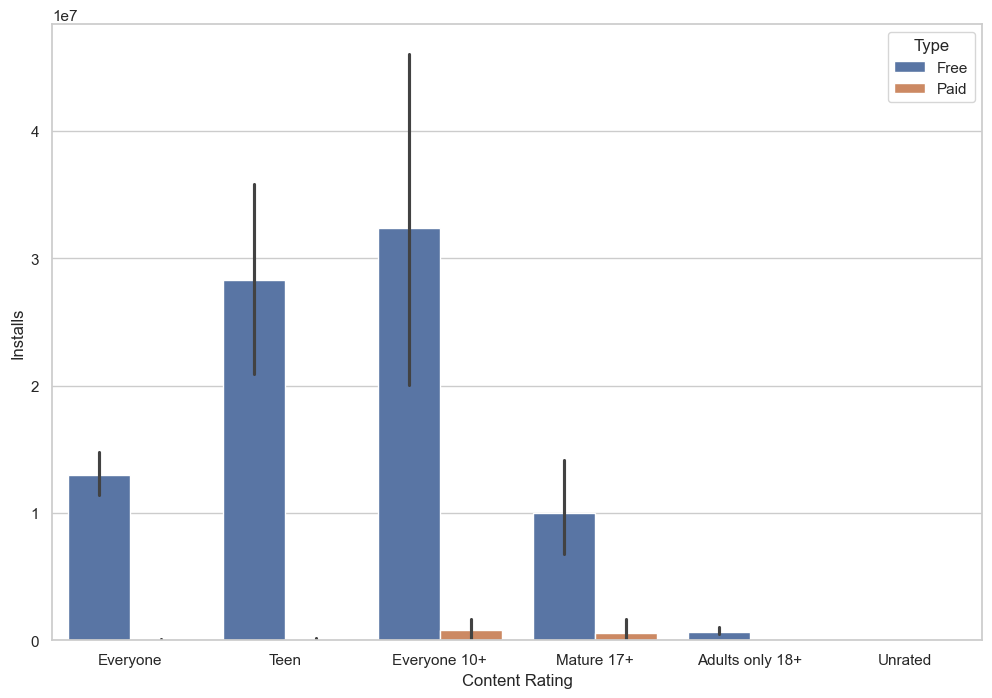

In [326]:
plt.figure(figsize=(12,8))
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=df)

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:80%; text-align:left">

## Columna Genres

In [327]:
df['Genres'].value_counts()

Genres
Tools                       841
Entertainment               588
Education                   527
Business                    427
Medical                     408
                           ... 
Role Playing;Brain Games      1
Strategy;Education            1
Racing;Pretend Play           1
Communication;Creativity      1
Strategy;Creativity           1
Name: count, Length: 119, dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:80%; text-align:left">

## Columna Versión actual

In [328]:
df['Current Ver'].value_counts()

Current Ver
Varies with device    1302
1.0                    802
1.1                    260
1.2                    177
2.0                    149
                      ... 
2.1.9f7                  1
Android 3.0 - 2017       1
3.36                     1
2.9.2                    1
6.1.61.1                 1
Name: count, Length: 2831, dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:80%; text-align:left">

## Columna de versión de Android

In [329]:
df['Android Ver'].value_counts()


Android Ver
4.1 and up            2379
4.0.3 and up          1451
4.0 and up            1337
Varies with device    1221
4.4 and up             893
2.3 and up             643
5.0 and up             546
4.2 and up             387
2.3.3 and up           279
2.2 and up             239
3.0 and up             237
4.3 and up             235
2.1 and up             133
1.6 and up             116
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [330]:
# Function to create a scatter plot
def scatters(col1, col2):
    # Create a scatter plot using Seaborn
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.scatterplot(data=df, x=col1, y=col2, hue="Type")
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

# Function to create a KDE plot
def kde_plot(feature):
    # Create a FacetGrid for KDE plots using Seaborn
    grid = sns.FacetGrid(df, hue="Type", aspect=2)

    # Map KDE plots for the specified feature
    grid.map(sns.kdeplot, feature)

    # Add a legend to distinguish between categories
    grid.add_legend()

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:80%; text-align:left">

## Análisis kde-Plot

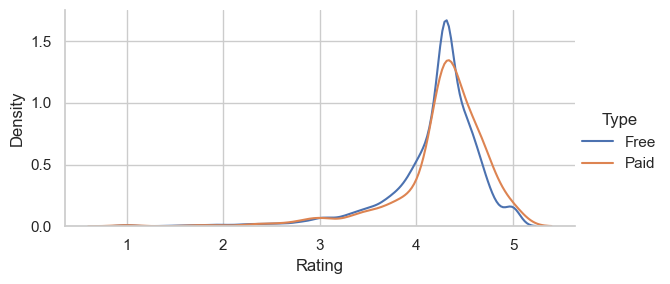

In [331]:
kde_plot('Rating')

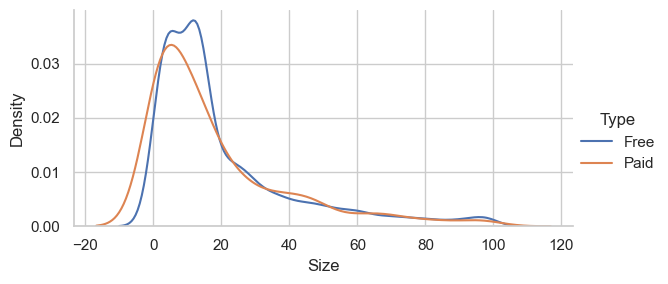

In [332]:
kde_plot('Size')

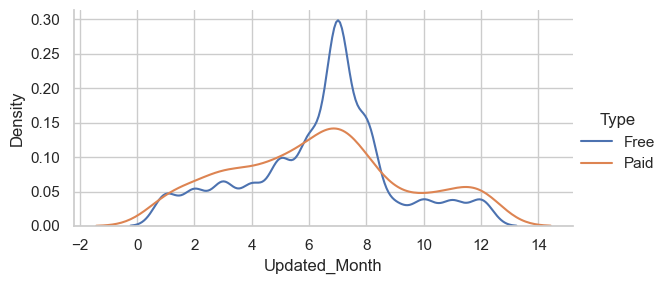

In [333]:
kde_plot('Updated_Month')

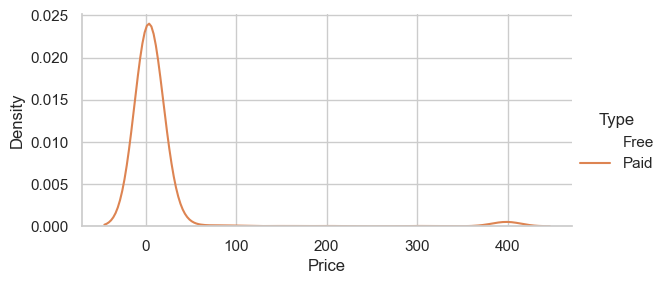

In [334]:
kde_plot('Price')

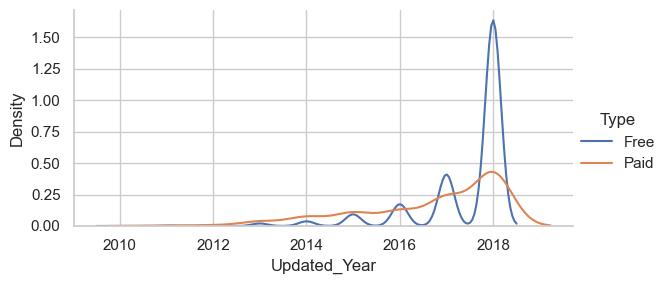

In [335]:
kde_plot('Updated_Year')

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:80%; text-align:left">

## Análisis de diagrama de dispersión

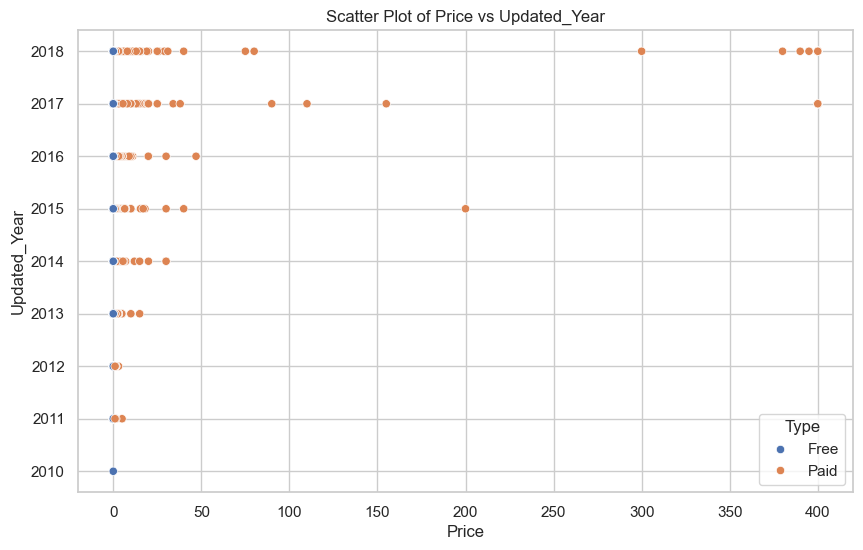

In [336]:
scatters('Price', 'Updated_Year')

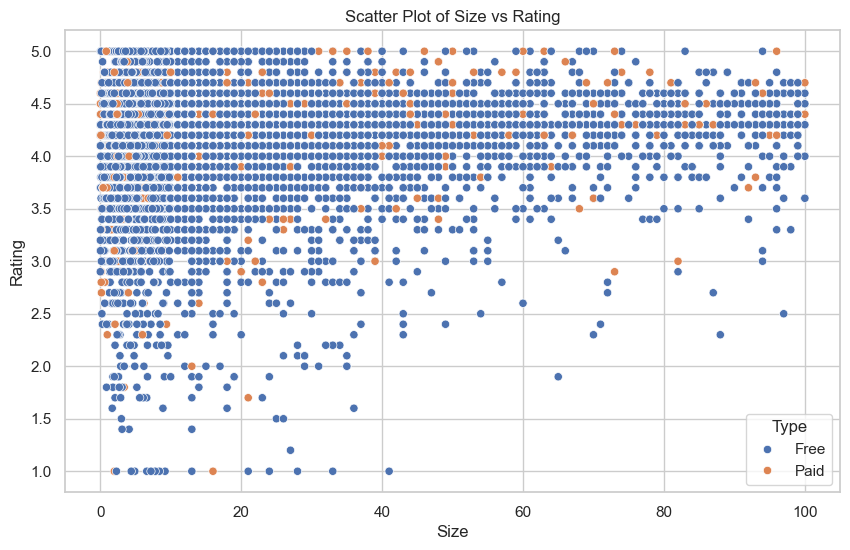

In [337]:
scatters('Size', 'Rating')

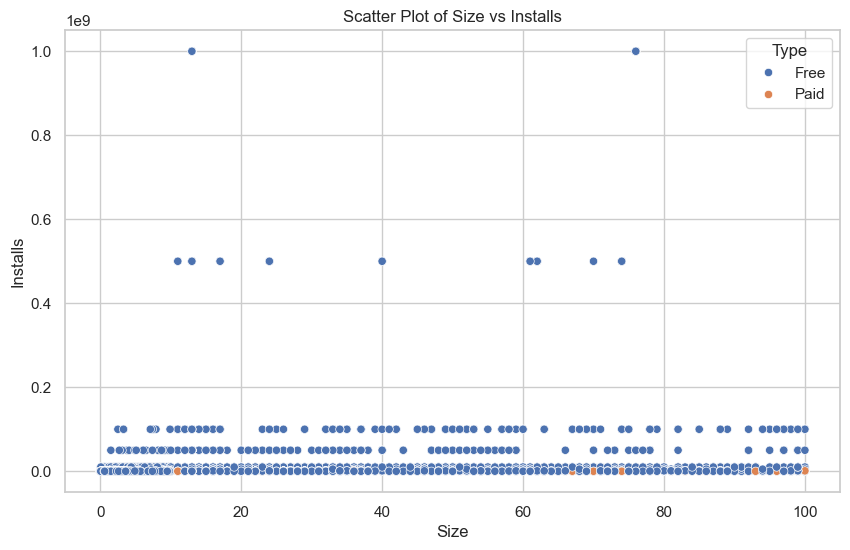

In [338]:
scatters('Size', 'Installs')

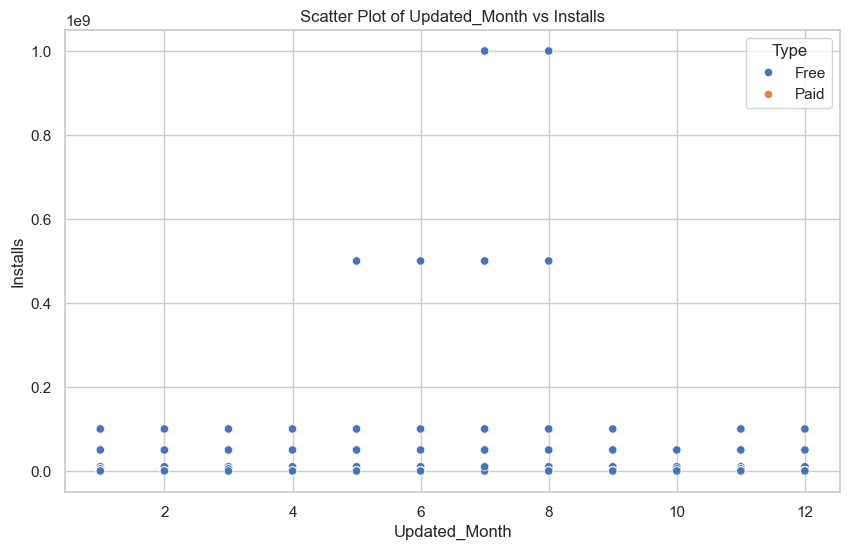

In [339]:
scatters('Updated_Month', 'Installs')

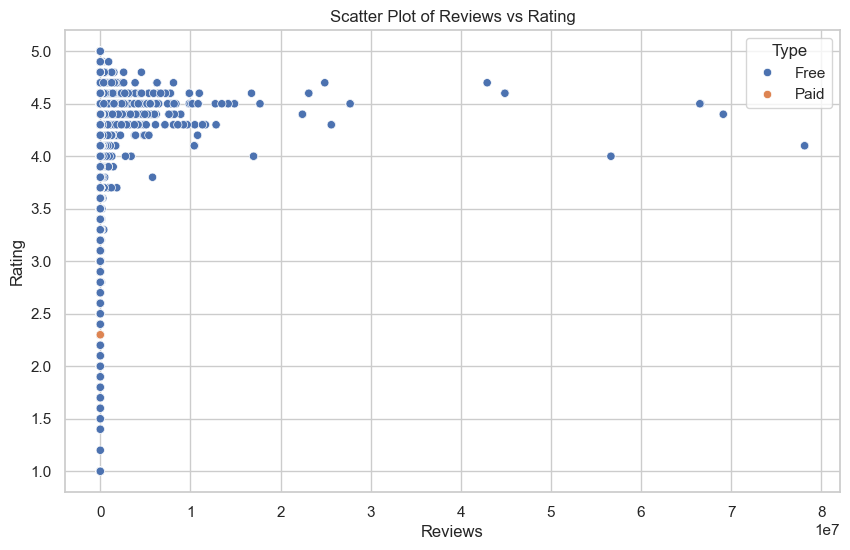

In [340]:
scatters('Reviews', 'Rating')

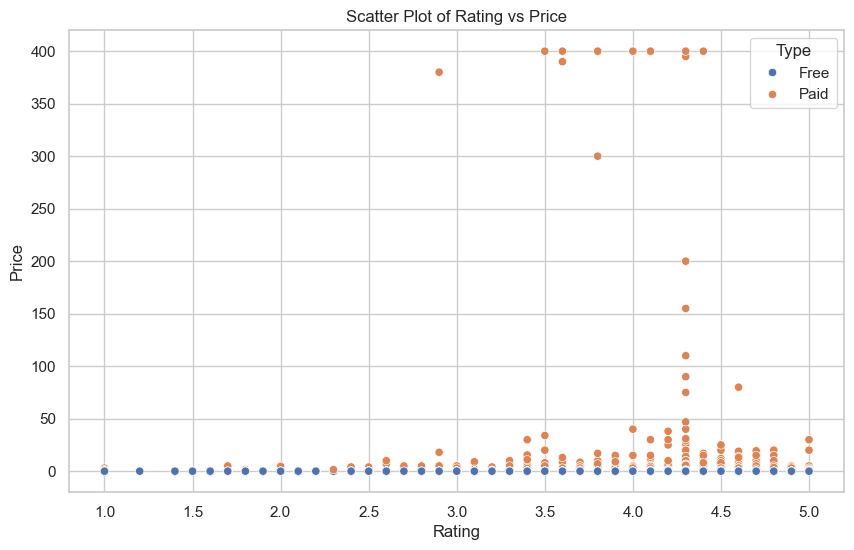

In [341]:
scatters('Rating', 'Price')

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:80%; text-align:left">

## Análisis adicional

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:80%; text-align:left">

### Aplicaciones con una calificación de 5.0

In [342]:
df_rating_5 = df[df.Rating == 5.]
print(f'There are {df_rating_5.shape[0]} apps having rating of 5.0')

There are 271 apps having rating of 5.0


<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:80%; text-align:left">

### Installs

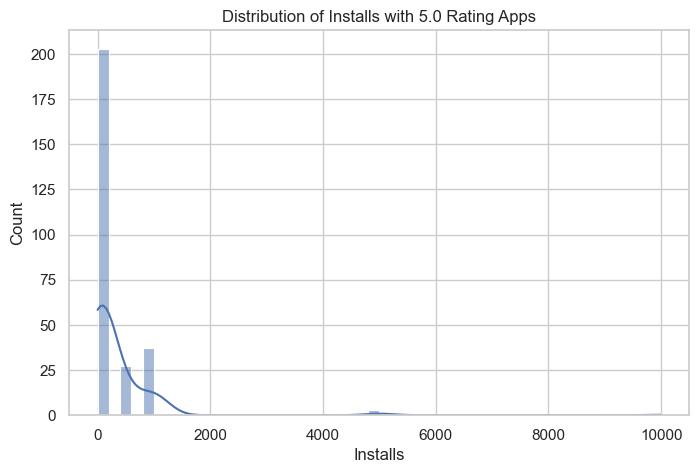

In [343]:
sns.histplot(data=df_rating_5, x='Installs', kde=True, bins=50)

plt.title('Distribution of Installs with 5.0 Rating Apps')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:80%; text-align:left">

**A pesar de las calificaciones completas, la cantidad de instalaciones de la mayoría de las aplicaciones es baja, por lo que no se las puede considerar los mejores productos.**

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:80%; text-align:left">

### Reviews

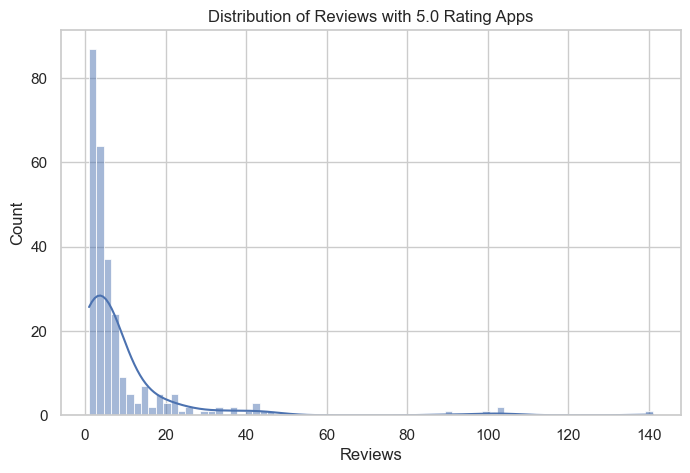

In [344]:
sns.histplot(data=df_rating_5, x='Reviews', kde=True)
plt.title('Distribution of Reviews with 5.0 Rating Apps')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:80%; text-align:left">

**La distribución está sesgada hacia la derecha, lo que muestra que las aplicaciones con pocas reseñas tienen calificaciones de 5,0, lo cual es engañoso.**

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:80%; text-align:left">

### Category

In [345]:
df_rating_5_cat =  df_rating_5['Category'].value_counts().reset_index()

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:80%; text-align:left">

**Las aplicaciones Familia, Estilo de Vida y Médica reciben la mayor cantidad de calificaciones de 5.0 en Google Play Store, y Familia representa aproximadamente una cuarta parte del total.**

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:80-%; text-align:left">

### Type

In [346]:
df_rating_5_type =  df_rating_5['Type'].value_counts().reset_index()

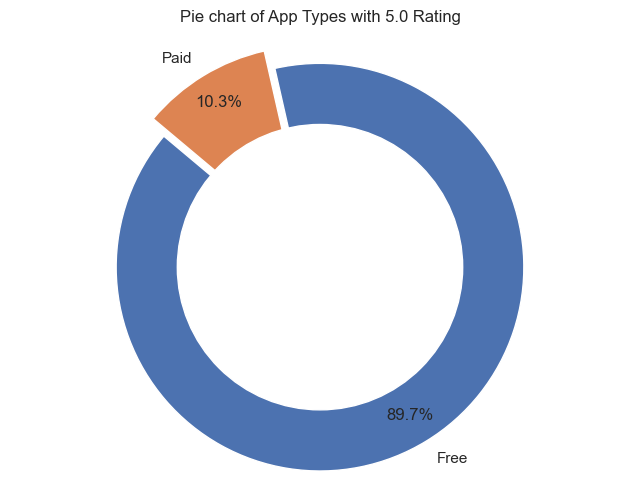

In [ ]:
# Create a pie chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Data for the pie chart
sizes = df_rating_5_type.iloc[:, 1]
labels = df_rating_5_type.iloc[:, 0]

# Pull a slice out by exploding it
explode = (0, 0.1)  # Adjust the second value to control the pull-out distance

# Create the pie chart with default colors
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=explode)

# Draw a circle in the center to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Gráfico circular de tipos de aplicaciones con calificación 5.0')

# Show the pie chart
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:80%; text-align:left">

**Casi el 90% de las aplicaciones con calificación 5.0 son gratuitas en Google Play Store.**

Text(0.5, 1.0, 'Time series plot of Last Updates')

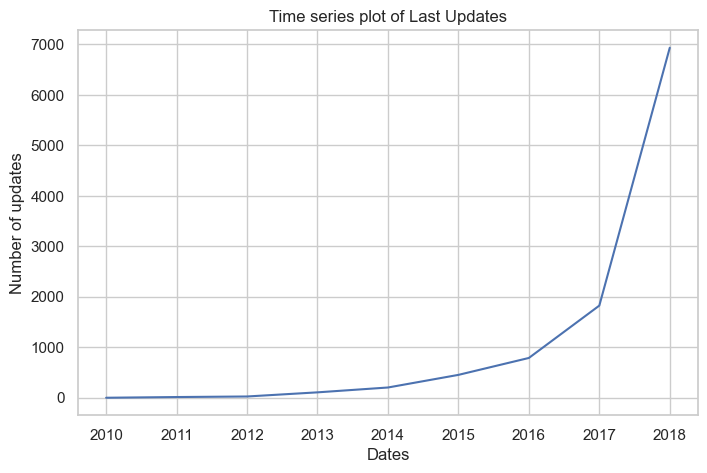

In [348]:
freq= pd.Series()
freq=df['Updated_Year'].value_counts()
freq.plot()
plt.xlabel("Dates")
plt.ylabel("Number of updates")
plt.title("Time series plot of Last Updates")

<a id="initial_analysis"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px 50px;"> Descarte de características</p>

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:80%; text-align:left">

Decidimos descartar las siguientes características:

* Aplicación: Los nombres de las aplicaciones no tienen valor para el modelo.
* Géneros: la información que almacena es la misma que la categoría de función.
* Versión actual: la versión actual de una aplicación no tiene un valor significativo.
* Versión de Android: la versión de Android de una aplicación no tiene un valor significativo.

In [349]:
pruned_features = ['App', 'Genres', 'Current Ver', 'Android Ver']

<a id="initial_analysis"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:80; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 6 | División de datos para modelado</p>

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:80%; text-align:left">
    
### Dividimos el conjunto de datos en 80% de tren y 20% de prueba.

In [350]:
target = 'Rating'

In [351]:
X = df.copy().drop(pruned_features+[target], axis=1)
y = df.copy()[target]

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:80%; text-align:left">
    
## Codificación de etiquetas

In [353]:
le_dict = defaultdict()


In [354]:
features_to_encode = X_train.select_dtypes(include=['category', 'object']).columns

for col in features_to_encode:
    le = LabelEncoder()

    X_train[col] = le.fit_transform(X_train[col]) # Fitting and tranforming the Train data
    X_train[col] = X_train[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas

    X_test[col] = le.transform(X_test[col]) # Only transforming the test data
    X_test[col] = X_test[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas

    le_dict[col] = le # Saving the label encoder for individual features

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:90%; text-align:left">
    
## Estandarización

In [355]:
# Converting and adding "Last Updated Month" to categorical features
categorical_features = features_to_encode + ['Updated_Month']
X_train['Updated_Month'] = X_train['Updated_Month'].astype('category')
X_test['Updated_Month'] = X_test['Updated_Month'].astype('category')

# Listing numeric features to scale
numeric_features = X_train.select_dtypes(exclude=['category', 'object']).columns

In [356]:
numeric_features

Index(['Reviews', 'Size', 'Installs', 'Price', 'Updated_Year'], dtype='object')

In [357]:
scaler = StandardScaler()

# Fitting and transforming the Training data
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
# X_train = scaler.fit_transform(X_train)

# Only transforming the Test data
X_test[numeric_features] = scaler.transform(X_test[numeric_features])
# X_test = scaler.transform(X_test)

<a id="initial_analysis"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:80; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 7 | Modelado</p>

<a id="monetary"></a>
## <b><span style='color:#fcc36d'>Step 7.1 |</span><span style='color:#ffffff'> Regresión</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:90%; text-align:left">
    
### Creando marco de datos para métricas

In [358]:
models = ['Linear', 'KNN', 'Random Forest']
datasets = ['train', 'test']
metrics = ['RMSE', 'MAE', 'R2']

multi_index = pd.MultiIndex.from_product([models, datasets, metrics],
                                         names=['model', 'dataset', 'metric'])

df_metrics_reg = pd.DataFrame(index=multi_index,
                          columns=['value'])

In [359]:
df_metrics_reg

value
model         dataset metric      
Linear        train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
KNN           train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
Random Forest train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:90%; text-align:left">
    
## Regresión Lineal

In [360]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [361]:
df_metrics_reg.loc['Linear', 'train', 'R2'] = lr.score(X_train, y_train)
df_metrics_reg.loc['Linear', 'test', 'R2'] = lr.score(X_test, y_test)

In [362]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

df_metrics_reg.loc['Linear', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Linear', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Linear', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Linear', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:90%; text-align:left">
    
### Regresión KNN

In [363]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [364]:
df_metrics_reg.loc['KNN', 'train', 'R2'] = knn.score(X_train, y_train)
df_metrics_reg.loc['KNN', 'test', 'R2'] = knn.score(X_test, y_test)

In [365]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

df_metrics_reg.loc['KNN', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['KNN', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['KNN', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['KNN', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:90%; text-align:left">
    
### Regresión Random Forest

In [366]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [367]:
df_metrics_reg.loc['Random Forest', 'train', 'R2'] = rf.score(X_train, y_train)
df_metrics_reg.loc['Random Forest', 'test', 'R2'] = rf.score(X_test, y_test)

In [368]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

df_metrics_reg.loc['Random Forest', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Random Forest', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Random Forest', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Random Forest', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:90%; text-align:left">
    
### Evaluación Regreción

In [369]:
# Rounding the values

df_metrics_reg['value'] = df_metrics_reg['value'].apply(lambda v: round(v, ndigits=3))
df_metrics_reg

value
model         dataset metric       
Linear        train   RMSE    0.478
                      MAE     0.319
                      R2      0.023
              test    RMSE    0.483
                      MAE     0.327
                      R2      0.037
KNN           train   RMSE    0.409
                      MAE     0.280
                      R2      0.286
              test    RMSE    0.510
                      MAE     0.349
                      R2     -0.072
Random Forest train   RMSE    0.468
                      MAE     0.309
                      R2      0.063
              test    RMSE    0.472
                      MAE     0.314
                      R2      0.081

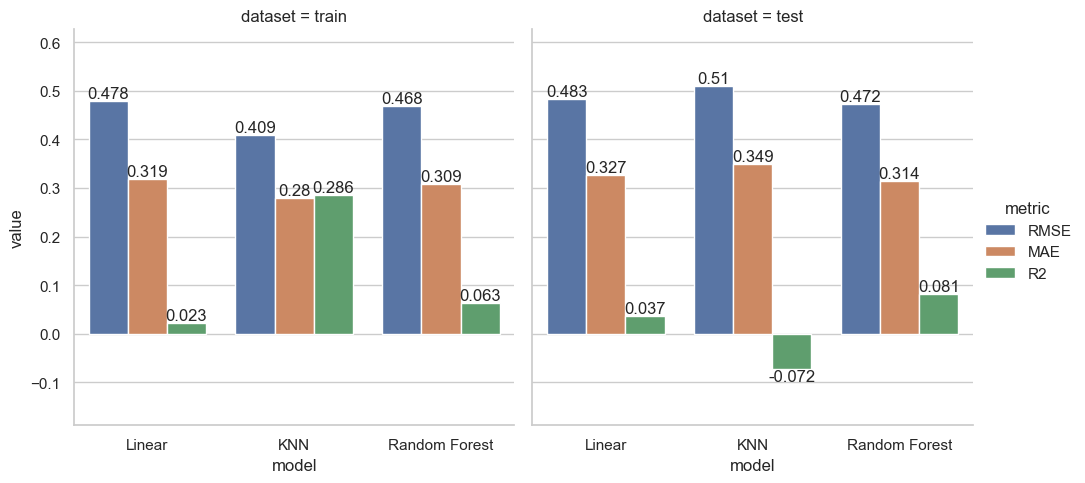

In [370]:
data = df_metrics_reg.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='value', hue='metric')

# Adding annotations to bars
# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:80%; text-align:left">
    
* **¡Las predicciones de regresión no se sostienen muy bien!**

* **Podemos interpretar que el conjunto de datos no es adecuado para el problema de regresión.**

<a id="initial_analysis"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 7 | Modelado</p>

<a id="monetary"></a>
## <b><span style='color:#fcc36d'>Step 7.2 |</span><span style='color:#ffffff'> Regresión</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:60%; text-align:left">
    

### Enmarquémoslo como un enunciado de un problema de clasificación.

### Conversión de la calificación de continua a discreta

In [371]:
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:60%%; text-align:left">
    
### Creando marco de datos para métricas

In [372]:
models = ['Logistic Regression', 'KNN', 'Random Forest']
datasets = ['train', 'test']

multi_index = pd.MultiIndex.from_product([models, datasets],
                                         names=['model', 'dataset'])

df_metrics_clf = pd.DataFrame(index=multi_index,
                          columns=['accuracy %'])

In [373]:
df_metrics_clf

accuracy %
model               dataset           
Logistic Regression train          NaN
                    test           NaN
KNN                 train          NaN
                    test           NaN
Random Forest       train          NaN
                    test           NaN

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:60%; text-align:left">
    
### Clasificación Regresión logística

In [374]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train_int)

LogisticRegression()

In [375]:
df_metrics_clf.loc['Logistic Regression', 'train'] = lr_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Logistic Regression', 'test'] = lr_clf.score(X_test, y_test_int)

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:60%; text-align:left">
    
### Clasificación KNeighbors

In [376]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train_int)

KNeighborsClassifier()

In [377]:
df_metrics_clf.loc['KNN', 'train'] = knn_clf.score(X_train, y_train_int)
df_metrics_clf.loc['KNN', 'test'] = knn_clf.score(X_test, y_test_int)

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:60%; text-align:left">
    
### Clasificación Random Forest

In [378]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train_int)

RandomForestClassifier()

In [379]:
df_metrics_clf.loc['Random Forest', 'train'] = rf_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Random Forest', 'test'] = rf_clf.score(X_test, y_test_int)

<div style="border-radius:10px; padding: 15px; background-color: #000000; font-size:60%; text-align:left">
    
### Evaluación de la clasificación

In [380]:
# Redondear y convertir las precisiones a porcentajes
df_metrics_clf['accuracy %'] = df_metrics_clf['accuracy %'].apply(lambda v: round(v*100, ndigits=2))
df_metrics_clf

accuracy %
model               dataset            
Logistic Regression train         78.96
                    test          76.93
KNN                 train         80.98
                    test          74.52
Random Forest       train        100.00
                    test          77.41

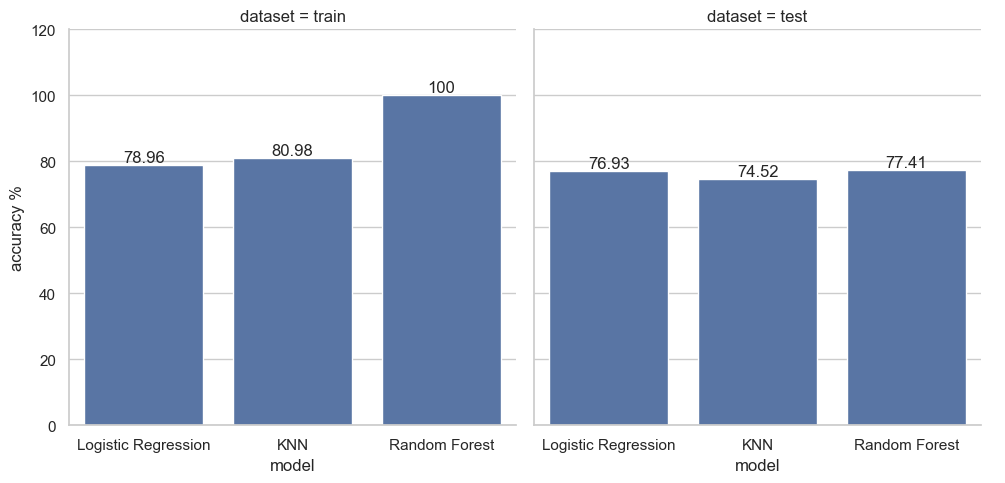

In [381]:
data = df_metrics_clf.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='accuracy %')

# Adding annotations to bars
# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
**After comparing with Regression models, its clear that we would get better results from Classification!**

<a id="initial_analysis"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 7 | Modelado</p>

<a id="monetary"></a>
## <b><span style='color:#fcc36d'>|</span><span style='color:#ffffff'> Conclusión</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #9d8cd1; font-size:130%; text-align:left">
* En conclusión, el conjunto de datos de las aplicaciones de Google Play Store se ha explorado y analizado utilizando diversas técnicas de visualización de datos con la ayuda de las bibliotecas Matplotlib, Seaborn y Plotly.

* El análisis preliminar, los métodos de visualización y la EDA proporcionaron información sobre los datos y ayudaron a comprender los patrones subyacentes y las relaciones entre las variables.

* El análisis del conjunto de datos de Google Play Store ha demostrado que existe una correlación débil entre la calificación y otros atributos de la aplicación, como el tamaño, las instalaciones, las reseñas y el precio. Descubrimos que había una correlación positiva moderada entre el número de instalaciones y la calificación, lo que sugiere que las aplicaciones mejor calificadas tienden a tener más instalaciones.

* También observamos que las aplicaciones gratuitas tienen calificaciones más altas que las aplicaciones pagas, y que el tamaño de la aplicación no parece tener un impacto significativo en la calificación.